In [40]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import seaborn as sns
import sklearn
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
display(HTML("<style>.container { width:100% !important; }</style>"))

In [41]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import scikitplot

In [45]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [46]:
df.sample

<bound method NDFrame.sample of                   Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90   
1       01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28   
2       01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31   
3       01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07   
4       01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
0       

In [47]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [48]:

#Extarcting time(year,month,days,hours,minutes) from Data time column


import datetime

todays_date = datetime.date.today()
print(todays_date)




2022-06-18


In [50]:
df["b_day"] = pd.to_datetime(df["Date Time"])


In [51]:
df["b_day"]

0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: b_day, Length: 420551, dtype: datetime64[ns]

In [52]:
df["Year"] = df["b_day"].dt.year
df["Month"] = df["b_day"].dt.month
df["Day"] = df["b_day"].dt.day
df["Hour"] = df["b_day"].dt.hour
df["Minute"] = df["b_day"].dt.minute


In [53]:
df["Year"]

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
420546    2016
420547    2016
420548    2016
420549    2016
420550    2017
Name: Year, Length: 420551, dtype: int64

In [54]:
df["Month"]

0          1
1          1
2          1
3          1
4          1
          ..
420546    12
420547    12
420548    12
420549    12
420550     1
Name: Month, Length: 420551, dtype: int64

In [55]:
df["Day"]

0          1
1          1
2          1
3          1
4          1
          ..
420546    31
420547    31
420548    31
420549    31
420550     1
Name: Day, Length: 420551, dtype: int64

In [56]:
df["Hour"]


0          0
1          0
2          0
3          0
4          0
          ..
420546    23
420547    23
420548    23
420549    23
420550     0
Name: Hour, Length: 420551, dtype: int64

In [57]:

df["Minute"]

0         10
1         20
2         30
3         40
4         50
          ..
420546    20
420547    30
420548    40
420549    50
420550     0
Name: Minute, Length: 420551, dtype: int64

In [58]:
df.sample(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),b_day,Year,Month,Day,Hour,Minute
201834,01.11.2012 15:30:00,963.16,9.15,285.36,5.15,76.0,11.61,8.82,2.79,5.72,9.16,1184.39,3.60,5.13,174.20,2012-01-11 15:30:00,2012,1,11,15,30
156356,21.12.2011 19:50:00,989.78,2.23,276.20,0.33,87.2,7.18,6.26,0.92,3.94,6.32,1249.05,3.56,5.71,257.10,2011-12-21 19:50:00,2011,12,21,19,50
316658,07.01.2015 10:30:00,999.95,2.76,275.92,1.26,89.8,7.45,6.69,0.76,4.17,6.69,1259.29,1.87,4.65,228.70,2015-07-01 10:30:00,2015,7,1,10,30
281863,10.05.2014 03:20:00,988.40,6.66,280.76,5.02,89.2,9.80,8.74,1.06,5.52,8.84,1226.37,1.88,3.32,232.30,2014-10-05 03:20:00,2014,10,5,3,20
284715,29.05.2014 22:40:00,993.18,7.93,281.64,5.99,87.5,10.69,9.35,1.34,5.88,9.42,1226.49,2.03,3.04,25.75,2014-05-29 22:40:00,2014,5,29,22,40
411824,01.11.2016 09:40:00,995.02,3.11,276.66,3.02,99.4,7.64,7.59,0.05,4.76,7.63,1251.05,1.20,2.36,185.70,2016-01-11 09:40:00,2016,1,11,9,40
248488,21.09.2013 15:20:00,999.65,14.88,288.07,10.09,73.0,16.95,12.37,4.58,7.73,12.38,1203.34,1.16,2.96,235.40,2013-09-21 15:20:00,2013,9,21,15,20
184065,01.07.2012 06:00:00,986.85,18.35,292.62,16.11,86.8,21.13,18.34,2.79,11.64,18.59,1171.02,1.73,2.72,262.40,2012-01-07 06:00:00,2012,1,7,6,0
216222,09.02.2013 13:30:00,990.56,-1.24,272.66,-3.30,85.8,5.58,4.78,0.79,3.01,4.83,1266.71,1.16,3.20,272.20,2013-09-02 13:30:00,2013,9,2,13,30
413832,15.11.2016 08:20:00,999.82,1.16,274.33,-3.29,72.1,6.64,4.79,1.85,2.98,4.79,1267.40,3.32,4.69,164.20,2016-11-15 08:20:00,2016,11,15,8,20


In [59]:

#Removing Date time and d_day coluns since we have extracted 

df_clearn =df.drop(columns=['Date Time', 'b_day'])


In [60]:
df_clearn

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year,Month,Day,Hour,Minute
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009,1,1,0,10
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,1,1,0,20
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,1,1,0,30
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,1,1,0,40
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,1,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12,31,23,20
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12,31,23,30
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12,31,23,40
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12,31,23,50


In [61]:
df_clearn.dtypes

p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
Year                 int64
Month                int64
Day                  int64
Hour                 int64
Minute               int64
dtype: object

In [62]:
df_clearn.columns.values

array(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'Year', 'Month', 'Day', 'Hour', 'Minute'], dtype=object)

In [63]:
#

train_columns = df_clearn.columns[df_clearn.columns != 'T (degC)']
traget_columns = df_clearn.columns[df_clearn.columns == 'T (degC)']

In [64]:
from sklearn.model_selection import train_test_split
X, test, y, y_test = train_test_split(df[train_columns], df[traget_columns], test_size = 0.30, random_state = 0)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler = sklearn.preprocessing.RobustScaler()
scaler = sklearn.preprocessing.StandardScaler()
X  = pd.DataFrame(scaler.fit_transform(X[train_columns]), columns=train_columns)
test = pd.DataFrame(scaler.transform(test[train_columns]), columns=train_columns)
X.shape

(294385, 18)

In [66]:
X.shape[1]

18

In [72]:
import keras
from keras import layers

input_s = layers.Input(shape=(X.shape[1]))
encoded = layers.Dense(18, activation='relu')(input_s)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(5, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(X.shape[1], activation='relu')(decoded)

autoencoder = keras.Model(input_s, decoded)
autoencoder.compile(
  loss='mse',
  optimizer='adam',
  metrics=['mse'])

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_26 (Dense)            (None, 18)                342       
                                                                 
 dropout_20 (Dropout)        (None, 18)                0         
                                                                 
 dense_27 (Dense)            (None, 10)                190       
                                                                 
 dropout_21 (Dropout)        (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 10)                60  

Epoch 1/5
9200/9200 [==============================] - 22s 2ms/step - loss: 0.8345 - mse: 0.8345 - val_loss: 0.8387 - val_mse: 0.8387
Epoch 2/5
9200/9200 [==============================] - 22s 2ms/step - loss: 0.8285 - mse: 0.8285 - val_loss: 0.8391 - val_mse: 0.8391


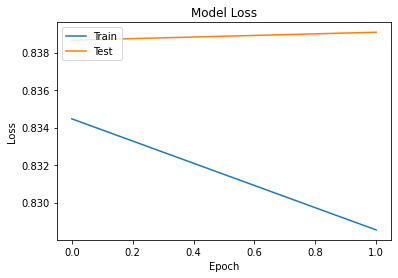

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
history = autoencoder.fit(x=X, y=X, epochs=5, verbose=1, validation_data=(test, test), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
train_predicted_x = autoencoder.predict(x=X)
train_events_mse = keras.losses.mean_squared_error(X, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)
print(cut_off)

1.5925137042999264


In [76]:
predicted = autoencoder.predict(x=test)
ms =  keras.losses.mean_squared_error(test, predicted)

test_df = pd.DataFrame(test.copy(), columns=test.columns)
print(test_df.columns)
test_df['Target'] = y_test.values
test_df['MSE'] = ms
test_df['Outlier'] = test_df['MSE'] > cut_off
test_df['Outlier'].value_counts()

Index(['p (mbar)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)',
       'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'Year',
       'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')


False    119657
True       6509
Name: Outlier, dtype: int64

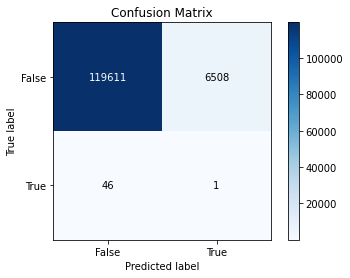

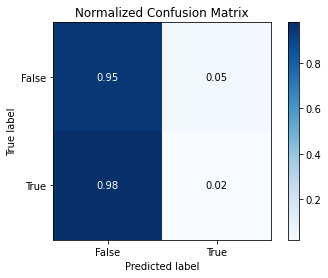

In [77]:


scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=True)
